# DAT341 Programming assignment 2: Random forests
## Yahui Wu(15hrs)


## Tianshuo Xiao(15hrs)

## Group 21

#  Task 1: Working with a dataset with categorical features

## Step 1. Reading the data

In [1]:
import pandas as pd
# Read the CSV file.
train_data = pd.read_csv('adult_train.csv')
test_data = pd.read_csv('adult_test.csv')

# Shuffle.
train_data_shuffled = train_data.sample(frac=1.0, random_state=0)
test_data_shuffled = test_data.sample(frac=1.0, random_state=0)

# Separate the input and output columns.
X_train = train_data_shuffled.drop("target", axis=1)
Y_train = train_data_shuffled["target"].dropna()
X_test = test_data_shuffled.drop("target", axis=1)
Y_test = test_data_shuffled["target"].dropna()

In [2]:
X_train

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
22278,49,Local-gov,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States
8950,49,Private,HS-grad,9,Divorced,Other-service,Not-in-family,Black,Female,0,0,40,United-States
7838,31,Private,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,50,United-States
16505,53,Private,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,43,United-States
19140,30,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,20,Private,Masters,14,Never-married,Exec-managerial,Own-child,White,Male,0,0,25,United-States
19648,37,Private,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,35,United-States
9845,23,Private,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,Black,Female,0,0,40,United-States
10799,42,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,United-States


## Step 2: Encoding the features as numbers

In [3]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Convert a DataFrame into a list of dictionaries
X_train = X_train.to_dict('records')
X_test = X_test.to_dict('records')

#DictVectorizer
dv = DictVectorizer()
X_train_encoded = dv.fit_transform(X_train)
X_test_encoded = dv.transform(X_test)

In [4]:
X_train

[{'age': 49,
  'workclass': 'Local-gov',
  'education': 'HS-grad',
  'education-num': 9,
  'marital-status': 'Married-civ-spouse',
  'occupation': 'Transport-moving',
  'relationship': 'Husband',
  'race': 'White',
  'sex': 'Male',
  'capital-gain': 0,
  'capital-loss': 0,
  'hours-per-week': 40,
  'native-country': 'United-States'},
 {'age': 49,
  'workclass': 'Private',
  'education': 'HS-grad',
  'education-num': 9,
  'marital-status': 'Divorced',
  'occupation': 'Other-service',
  'relationship': 'Not-in-family',
  'race': 'Black',
  'sex': 'Female',
  'capital-gain': 0,
  'capital-loss': 0,
  'hours-per-week': 40,
  'native-country': 'United-States'},
 {'age': 31,
  'workclass': 'Private',
  'education': 'Prof-school',
  'education-num': 15,
  'marital-status': 'Never-married',
  'occupation': 'Prof-specialty',
  'relationship': 'Not-in-family',
  'race': 'White',
  'sex': 'Male',
  'capital-gain': 0,
  'capital-loss': 0,
  'hours-per-week': 50,
  'native-country': 'United-States'

In [5]:
#We select Gradient Boosting Classifer to test the data
from sklearn.ensemble import GradientBoostingClassifier

clf_gbc = GradientBoostingClassifier(random_state=0, max_depth=3)

score_GBC = cross_val_score(clf_gbc, X_train_encoded, Y_train)
print(f"GradientBoostingClassifier aggregate score: {score_GBC.mean()}")

GradientBoostingClassifier aggregate score: 0.865636879708736


In [6]:
clf = GradientBoostingClassifier()
clf.fit(X_train_encoded, Y_train)
Y_train_pred = clf.predict(X_train_encoded)
Y_test_pred = clf.predict(X_test_encoded)
GBC_train_score = accuracy_score(Y_train_pred, Y_train)
GBC_test_score = accuracy_score(Y_test_pred, Y_test)
print(f"GradientBoostingClassifier train score: {GBC_train_score}")
print(f"GradientBoostingClassifier test score: {GBC_test_score}")

GradientBoostingClassifier train score: 0.868769386689598
GradientBoostingClassifier test score: 0.8711381364781033


We get the same accuracy testing

## Step 3. Combining the steps.

In [7]:
# Build a Pipeline
from sklearn.pipeline import make_pipeline
  
pipeline = make_pipeline(
  DictVectorizer(),
  GradientBoostingClassifier()
)

In [8]:
# Verification
score_pip = cross_val_score(pipeline, X_train, Y_train)
print(f"Pipeline aggregate score: {score_pip.mean()}")

Pipeline aggregate score: 0.865636879708736


# Task 2: Decision trees and random forests

## Underfitting and overfitting in decision tree classifiers

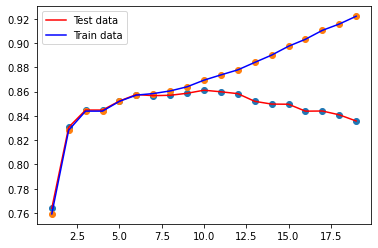

In [9]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

scores_test = []
scores_train = []
for i in range(1,20):
    pipeline = make_pipeline(
    DictVectorizer(),
    DecisionTreeClassifier(max_depth=i)
    )

    pipeline.fit(X_train, Y_train)
    score_test = pipeline.score(X_test, Y_test)
    score_train = pipeline.score(X_train, Y_train)
    #print(f" Train Score for depth={i}: {score_train}")
    #print(f" Test Score for depth={i}: {score_test}")
    scores_test.append(score_test)
    scores_train.append(score_train)
    
plt.scatter(range(1,20), scores_test) 
plt.scatter(range(1,20), scores_train)
plt.plot(range(1,20),scores_test,'r',label='Test data')
plt.plot(range(1,20),scores_train,'b',label='Train data')
plt.legend()
plt.show()

## Underfitting and overfitting in random forest classifiers.

Training time = 1: 19.950900554656982s


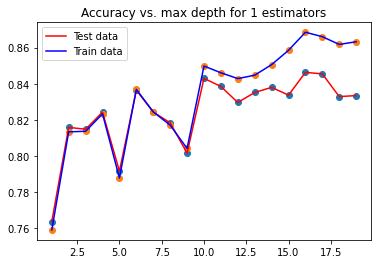

Training time = 5: 20.651201963424683s


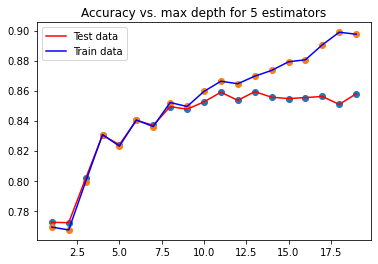

Training time = 10: 21.426565408706665s


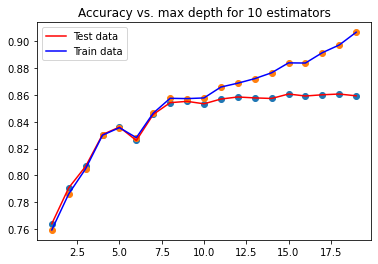

Training time = 15: 22.6814386844635s


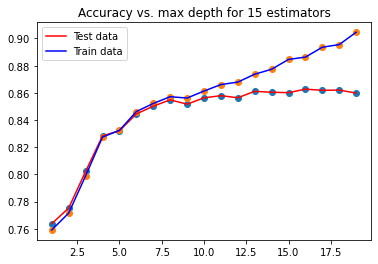

Training time = 20: 23.399152994155884s


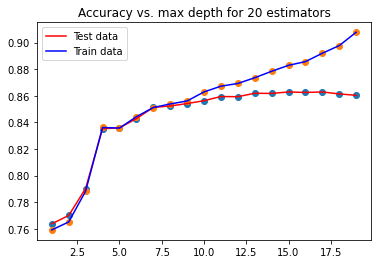

Training time = 25: 24.7429780960083s


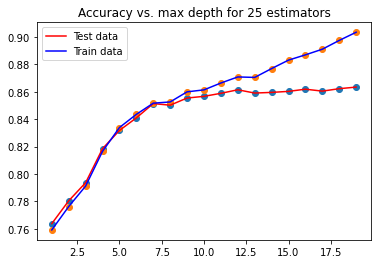

Training time = 50: 30.220212936401367s


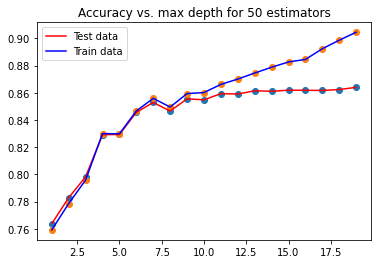

Training time = 100: 40.3199348449707s


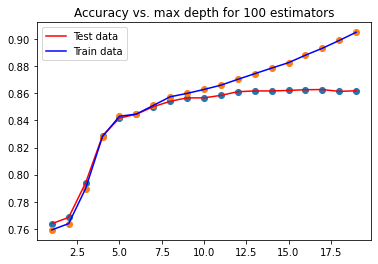

Training time = 200: 63.71877980232239s


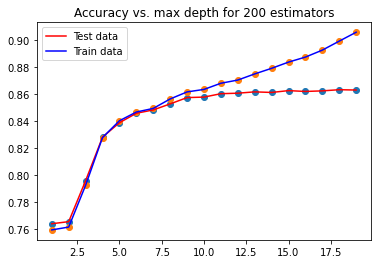

In [10]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
import time

times = []
best_score = []
for estimators in (1, 5, 10, 15, 20, 25, 50, 100, 200):#, 20, 25, 50, 100, 200
    scores_test = []
    scores_train = []
    start = time.time()
    for i in range(1,20):
        
        pipeline = make_pipeline(
        DictVectorizer(),
        RandomForestClassifier(n_estimators=estimators, max_depth=i, n_jobs=-1)
        )
        RFC = pipeline.fit(X_train, Y_train)
        score_test = RFC.score(X_test, Y_test)
        score_train = RFC.score(X_train, Y_train)
        #print(f" Train Score for depth={i}: {score_train}")
        #print(f" Test Score for depth={i}: {score_test}")
        scores_test.append(score_test)
        scores_train.append(score_train)
          
    best_score.append(max(scores_test))    
    stop = time.time()
    print(f"Training time = {estimators}: {stop - start}s")
    times.append(stop - start)
    
    plt.title(f"Accuracy vs. max depth for {estimators} estimators")
    plt.scatter(range(1,20), scores_test) 
    plt.scatter(range(1,20), scores_train)
    plt.plot(range(1,20), scores_test,'r',label='Test data')
    plt.plot(range(1,20), scores_train,'b',label='Train data')
    plt.legend()
    plt.show()


### What's the difference between the curve for a decision tree and for a random forest with an ensemble size of 1, and why do we see this difference?

From the figures above we can see that decision tree classifier curve is smoother than the random forest classifier with an ensemble size of 1.

This is because in a random forest classifier, it does not consider all possible input features whenever a node is to be split throughout the training process. Random forest is selecting part of training set as a subset to train the model so the scores reflecting the performance on training set and test set are lower than Decision tree which uses all training data to train the model.

### What happens with the curve for random forests as the ensemble size grows?

The variance of the score between each max depth becomes samller and the curve goes more smoothly as the ensemble size grows.This is because the accuracy scores are averaged over many trees corresponding to the ensemble size, which means that each tree has a smaller impact on it

### What happens with the best observed test set accuracy as the ensemble size grows?

Text(0, 0.5, 'Accuracy')

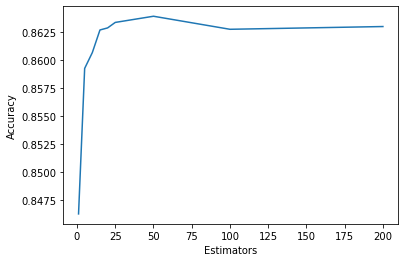

In [11]:
plt.plot((1, 5, 10, 15, 20, 25, 50, 100, 200),best_score)
plt.xlabel("Estimators")
plt.ylabel("Accuracy")

As the ensemble size increases, the best observed test set accuracy increases and then stabilizes.

### What happens with the training time as the ensemble size grows?

Text(0, 0.5, 'Time(s)')

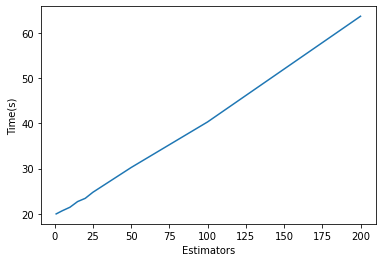

In [12]:
plt.plot((1, 5, 10, 15, 20, 25, 50, 100, 200), times)
plt.xlabel("Estimators")
plt.ylabel("Time(s)")

The training time gradually increases. When the ensemble size is greater than 14, the training time increases linearly.

## Task 3: Feature importances in random forest classifiers

In [13]:
import pandas as pd
import numpy as np

In [14]:
pipeline = make_pipeline(
        DictVectorizer(),
        RandomForestClassifier(n_estimators=200, max_depth=15, n_jobs=-1)
        )

In [15]:
pipeline.fit(X_train, Y_train)

Pipeline(steps=[('dictvectorizer', DictVectorizer()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=15, n_estimators=200,
                                        n_jobs=-1))])

In [16]:
name = pipeline.steps[0][1].feature_names_
importance = pipeline.steps[1][1].feature_importances_ 

In [17]:
df = list(zip(name, importance))
df.sort(reverse=True, key=lambda pair: pair[1])

In [18]:
for name, importance in df[:5]:
    print(f"Feature {name} has importance {importance}")

Feature capital-gain has importance 0.1500330165486396
Feature marital-status=Married-civ-spouse has importance 0.112357799343384
Feature education-num has importance 0.1024372173419731
Feature relationship=Husband has importance 0.08420678439822823
Feature age has importance 0.08348844400095662


Based on the predictions generated in the trees that make up the random forest, the importance scores of individual features show us which features are good at distinguishing between the two labels in that dataset. As shown in the results obtained above, the top five in terms of importance are capital-gain, marital-status=Married-civ-spouse, education-num,age and relationship=Husband.Large capital gains lead to more wealth and therefore more pay. A person's marital status may increase the level of income due to the presence of the other person. Education-num reflects the number of people with education. Generally speaking, a person get the more educatation, the higher the salary level. Age also affects income. Younger who have just graduated and older people generally have lower incomes, while middle-aged people have relatively higher incomes. In general, in a marriage, the husband will earn more than the wife. In conclusion, the above characteristics are not necessarily related to the level of salary, but they are still factors that distinguish different income groups.

### Permutation importance.

1.It records baseline accuracy (classifier) or R^2 scores (regressor) by passing a validation set or out-of-bag (OOB) sample through a random forest

2.It aligns the column values of individual predictor variable characteristics and then passes all test samples back to the random forest and recalculates the accuracy or R^2. the importance of the characteristic lies in the difference between the baseline and the overall decrease in accuracy or R^2 caused by the aligned columns.

3.The permutation importance does not require retraining of the model after ranking each column and a single importance function can cover all models.

### Drop-column importance.

1.Permutation importance does not require the retraining of the underlying model in order to measure the effect of shuffling variables on overall model accuracy.Drop-column importance strategy can give the most accurate feature importance.

2.This idea to get a baseline performance score as with permutation importance, but then it drop a column entirely, retrain the model, and recompute the performance score. 